<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [3]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 

In [4]:
#Verificamos información del DataFrame
Micro_Retailer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [6]:
#Imprimo los primeros 5 registro del dataframe
Micro_Retailer.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [7]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Micro_Retailer['214_customer_relationship_tools'].value_counts().reset_index()
Tabla_freq

,214_customer_relationship_tools,count
0,Redes sociales,27
1,Aplicación móvil,21
2,Ninguna,20
3,"Aplicación móvil,Redes sociales",13
4,Cuaderno,6
5,Teléfono,1
6,"Cuaderno,Redes sociales",1
7,"Aplicación móvil,De frente",1
8,Físico,1
9,"Aplicación móvil,Ninguna",1


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>1]
Filtro

In [ ]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('214_customer_relationship_tools')
Filtro_index

Text(0, 0.5, 'Frecuencia')

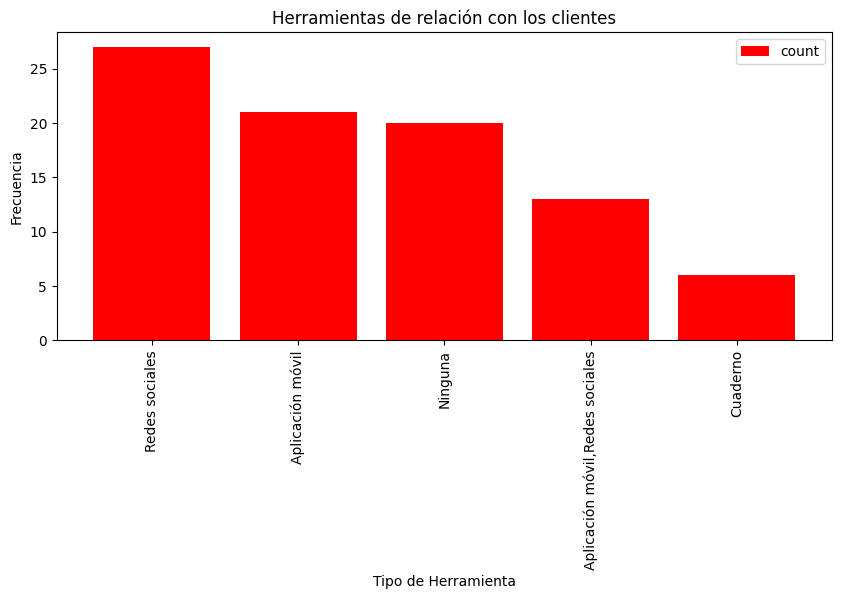

In [10]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red")
plt.title('Herramientas de relación con los clientes')
plt.xlabel('Tipo de Herramienta')
plt.ylabel('Frecuencia')

<Axes: xlabel='214_customer_relationship_tools'>

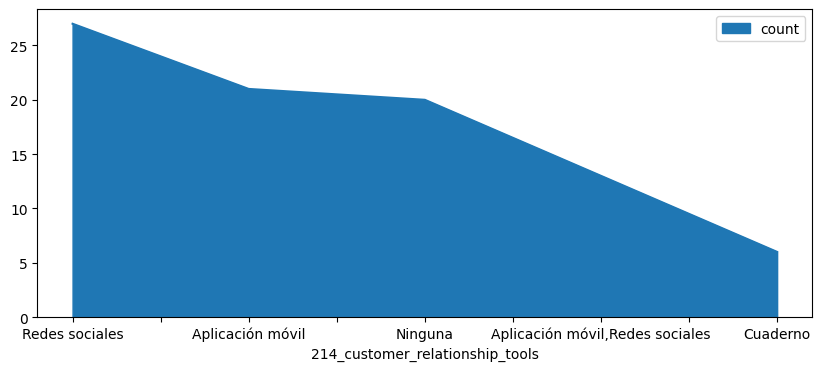

In [12]:
#Realizamos grafico de área del dataframe filtrado
Filtro_index.plot(kind='area', figsize=(10,4),alpha = 1)

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
Filtro_index["count"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

**Determinación de Clases para datos agrupados**


In [16]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Corroboramos valores nulos
valores_nulos=Micro_Retailer.isnull().sum()
valores_nulos

In [19]:
#Calculamos el numero total de la población "n"
Micro_Retailer['_latitude']. info()
n=171

<class 'pandas.core.series.Series'>
RangeIndex: 171 entries, 0 to 170
Series name: _latitude
Non-Null Count  Dtype  
--------------  -----  
171 non-null    float64
dtypes: float64(1)
memory usage: 1.5 KB


In [20]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Micro_Retailer['_latitude'].max()
Min=Micro_Retailer['_latitude'].min()
Limites= [Min, Max]
Limites

[18.9993095, 19.0752733]

In [21]:
#Calculamos el rango R
R=Max-Min
R

0.07596380000000025

In [22]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
ni

8.41354708650195

In [16]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

0.009028748424296662

**Creación de Categorias a partir de clases**

In [ ]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(18.9993094, 19.0752734, 9)
intervalos

In [24]:
#Creamos las categorías 
categorias= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8"]

In [ ]:
#Finalmente creamos las categorías en la columna numérica
Micro_Retailer['_latitude']=pd.cut(x= Micro_Retailer['_latitude'], bins=intervalos, labels= categorias)
Micro_Retailer['_latitude']

0      Categoría6
1      Categoría6
2      Categoría7
3      Categoría7
4      Categoría7
5      Categoría7
6      Categoría7
7      Categoría7
8      Categoría7
9      Categoría7
10     Categoría3
11     Categoría3
12     Categoría3
13     Categoría3
14     Categoría3
15     Categoría3
16     Categoría3
17     Categoría3
18     Categoría3
19     Categoría3
20     Categoría5
21     Categoría7
22     Categoría7
23     Categoría7
24     Categoría7
25     Categoría7
26     Categoría7
27     Categoría7
28     Categoría7
29     Categoría7
30     Categoría7
31     Categoría7
32     Categoría7
33     Categoría8
34     Categoría4
35     Categoría2
36     Categoría2
37     Categoría2
38     Categoría2
39     Categoría2
40     Categoría3
41     Categoría3
42     Categoría2
43     Categoría3
44     Categoría5
45     Categoría5
46     Categoría3
47     Categoría2
48     Categoría2
49     Categoría2
50     Categoría2
51     Categoría4
52     Categoría5
53     Categoría5
54     Categoría5
55     Cat